In [1]:
import numpy as np
from scipy.signal import convolve2d 
from os import path, getcwd, system, getenv
from astropy.io import fits
from time import perf_counter
import urllib.request
import os

import matplotlib
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
import matplotlib.gridspec as gridspec

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from matplotlib.backends.backend_pdf import PdfPages

import sys,inspect
currentdir = path.dirname(path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = path.dirname(currentdir)
sys.path.append(parentdir)
# from deconv import cube_deconv
# from ppxf_wrap import ppxf_wrap

# import warnings

# if True:
#     print('Set warnings.filterwarnings as "ignore"')
#     print('Warning Message will not be printed')
#     warnings.filterwarnings("ignore")

from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import constants
import pandas as pd

# import plotly.express as px
from astroquery.mast import Observations


from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.nddata.utils import Cutout2D

from astropy.wcs import WCS
import astropy

from urllib.error import HTTPError
from astroquery.skyview import SkyView



computer = 1
maindir = "C:/Users/maxri/Desktop/Classes 4-1/Research/fuse"
obn = 90
skydowni ="./images_redOb{}".format(obn); 

In [2]:
#Create Object List/
#Save to Object Tables

catalogdir = "C:/Users/maxri/Desktop/Classes 4-1/Research/data/VI_129_fuse.dat.fits"
catalog = fits.open(catalogdir)

catheader = catalog[0]; catlist = catalog[1];

dflist = pd.DataFrame(catlist.data)



catalog.close()


obs=dflist.query("Class == {} and Avail=='y'".format(obn));

dflist



obsn1 = []
for i in obs.iterrows():
    b = [i[1][1].split()[0],i[1][2], i[1][3]] 
    obsn1.append(b)
    

    
obsn1

s1 = maindir+"/tbls/Objects{}.tbl".format(obn); 

np.savetxt(s1,obsn1,fmt="%s",delimiter = " ")

In [3]:
#Skyview Query by Object name or Coordinate, reads in the from Object table. 
#Image query block

size = 1600

width_val = u.Quantity(size, unit = 'arcsec')
height_val =  u.Quantity(size, unit = 'arcsec')

t3 = []
# if computer == 2:
#     t = pd.read_table("C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/objs2.tbl",header=None)
# if computer == 1:
#     t = pd.read_table("C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/tbls/objs2.tbl",header=None)
    
    
    #Read selected class object table
if computer == 1:
    t2 = pd.read_table(s1,header=None)
    
# for i in t.values:
#     t3.append(i[0])


coordsn = [];t4=[]


for i in t2.values:
    b = i[0].split()
    c = SkyCoord(b[1],b[2], unit=u.deg)
    coordsn.append(c)
    t4.append(b[0])
    
coordsn
    

objnamesn = t4; objnames = objnamesn;


obstables2 = []; coords = [];

#pixels initially 300 x 300
#Initial Skyview Query by name

surveys = ['DSS', 'DSS1 Blue', 'DSS1 Red', 'DSS2 Red', 'DSS2 Blue', 'DSS2 IR'] #use surveyindex = 3 Dss2red

surveyindex = 3


for i in range(len(objnamesn)):
        paths = [];
        try:
            paths = SkyView.get_images(position = coordsn[i], 
                       survey=surveys[surveyindex],width = width_val,height = height_val,pixels = [1000,1000])
            hdr = paths[0][0].header
            a = hdr['HISTORY'][33].split()
            cd= [float(a[2]),float(a[3])]
            print(objnamesn[i],surveys[surveyindex])
            c = SkyCoord(cd[0],cd[1], unit=u.deg)
            coords.append(c)
    
        except HTTPError:
            print("No Result for ", objnamesn[i], surveys[surveyindex])
        obstables2.append(paths)
        
        
objnames = objnamesn
        
result = pd.DataFrame(obstables2)

obstables2, result, objnamesn,coords
#objnamesn, coordsn

HS-1140+2711 DSS2 Red
HS-1310+4308 DSS2 Red
A1795 DSS2 Red
HS-0834+1509 DSS2 Red
VIRGOI DSS2 Red
VIRGOII DSS2 Red
VIRGOIII DSS2 Red
COMAI DSS2 Red
A2597 DSS2 Red
HE-1347-2457 DSS2 Red
HE-2217-2818 DSS2 Red
HS-2337+1845 DSS2 Red
HS-0119+1432 DSS2 Red
HS-1549+1919 DSS2 Red
HS-0035+4405 DSS2 Red
HE-2156-4020 DSS2 Red
HS-1345+2855 DSS2 Red
HE-1338-0724 DSS2 Red
HS-1104+0452 DSS2 Red
HS-1110+1537 DSS2 Red
HS-1104+4259 DSS2 Red
HS-1140+2711 DSS2 Red
HS-1140+2711 DSS2 Red
HS-1700+6416 DSS2 Red
HS-1700+6416 DSS2 Red
ABELL3112 DSS2 Red
ABELL3112 DSS2 Red
HS-1700+6416 DSS2 Red
HS-1700+6416 DSS2 Red
ABELL2029 DSS2 Red
HS1700+6416 DSS2 Red
HS1700+6416 DSS2 Red
HS1700+6416 DSS2 Red
HS1700+6416 DSS2 Red
HS1700+6416 DSS2 Red
HS1700+6416 DSS2 Red
HS1700+6416 DSS2 Red


([[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D855A2620>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D85C9FF70>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D856200A0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D85541A50>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D85BF34C0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D86F7CF70>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D86F4F160>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D85CA8280>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D85125CF0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D85B2F610>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D86F7D510>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D8549A920>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020D85308280>]],
  [[<astropy.io.fits.hdu.

In [4]:
#Skyview Download Images Code Block, to same convention as before
#Create Download directory too

pt = os.path.join(maindir, skydowni[2:])
try:
    os.mkdir(os.path.normpath(pt))
    print("Created images_red directory")
except:
    print("Directory already exists")

result;
coords
for i in range(len(result)):
    a = surveys[surveyindex].split() #Survey
    b = objnames[i].split()
    name = b[0] #+ b[1]     #OBjName
    if i < 9:
        fname = "000{}_{}_{}_{}_{}".format(i+1,coordsn[i].ra.deg,coordsn[i].dec.deg,a[0]+a[1],name)
    else:
        fname = "00{}_{}_{}_{}_{}".format(i+1,coordsn[i].ra.deg,coordsn[i].dec.deg,a[0]+a[1],name)
    #print(fname)
    result[0][i][0].writeto(skydowni+ "/"+fname+".fits", output_verify='exception', overwrite=True, checksum=False)
    
    

Directory already exists


In [5]:
#MAin FUSE DOWNLOAD BLOCK
def set_rcparams_prop(amp=1, fs=22, tickamp=None):
    fs=18
    if tickamp==None:
        tickamp=amp
    tickmajorwidth=2.5*amp
    tickminorwidth=2.5*amp
    axeslw=2.5*amp
    tmjs=6*tickamp
    tmns=tmjs/3.5*2
    plt.rcParams['axes.titlesize']=fs
    plt.rcParams['axes.labelsize']=fs
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    plt.rcParams['axes.linewidth'] = axeslw
    plt.rcParams['xtick.major.width'] = tickmajorwidth
    plt.rcParams['ytick.major.width'] = tickmajorwidth
    plt.rcParams['xtick.minor.width'] = tickminorwidth
    plt.rcParams['ytick.minor.width'] = tickminorwidth
    plt.rcParams['xtick.major.size'] = tmjs
    plt.rcParams['ytick.major.size'] = tmjs
    plt.rcParams['xtick.minor.size'] = tmns
    plt.rcParams['ytick.minor.size'] = tmns

obs_tables=[]
for i in range(len(objnames)):
    print(objnames[i]) #objectname=objname[i] vs coordinates=coordsn[i] Object Name vs Coordinate Query
    obs_tables.append(Observations.query_criteria(obs_collection='FUSE',coordinates=coordsn[i], radius=".5 deg"))

#Main Fuse Download
fnames=[]


#download files
if computer == 1:
    down_dir=maindir + "/temp"
if computer == 2:
    down_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/temp'

for i in range(len(obs_tables)):
# for i in [6]:
    otb=obs_tables[i]
    pl=Observations.get_product_list(obs_tables[i])
    urls=pl['dataURI']
    rr=[x.find('00000all2ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    print(urls)
    manifest = Observations.download_products(dpl, download_dir=down_dir)
    print(obs_tables[i]['target_name'])
    print(manifest)
    
    rr=[x.find('00000all4ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    print(urls)
    manifest = Observations.download_products(dpl, download_dir=down_dir)
    print(obs_tables[i]['target_name'])
    print(manifest)
    
#     rr=[x.find('00000all3ttag') for x in urls]
#     dpl=pl[np.array(rr)>0]
#     print(urls)
#     manifest = Observations.download_products(dpl, download_dir=down_dir)
#     print(obs_tables[i]['target_name'])
#     print(manifest)
#     needs documentation
    
#     exptimes=obs_tables[4]['t_exptime']
# #     print(exptimes)
# #     cond=exptimes>5000
#     # print(obs_tables[4][cond])
#     fexptimes=obs_tables[4][cond]['t_exptime']
    

HS-1140+2711
HS-1310+4308
A1795
HS-0834+1509
VIRGOI
VIRGOII
VIRGOIII
COMAI
A2597
HE-1347-2457
HE-2217-2818
HS-2337+1845
HS-0119+1432
HS-1549+1919
HS-0035+4405
HE-2156-4020
HS-1345+2855
HE-1338-0724
HS-1104+0452
HS-1110+1537
HS-1104+4259
HS-1140+2711
HS-1140+2711
HS-1700+6416
HS-1700+6416
ABELL3112
ABELL3112
HS-1700+6416
HS-1700+6416
ABELL2029
HS1700+6416
HS1700+6416
HS1700+6416
HS1700+6416
HS1700+6416
HS1700+6416
HS1700+6416
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0530301/a0530301001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530301/a0530301002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530301/a0530301003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530301/a0530301004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530301/a0530301701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530301/a05303010011attagfraw.fit.gz
    mast:FU

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531601000\a053160100000all4ttagfcal.fit.gz with expected size 618982. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531602000\a053160200000all4ttagfcal.fit.gz with expected size 625137. [astroquery.query]
target_name 
------------
HS-1140+2711
HS-1140+2711
HS-1140+2711
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0530301000\a053030100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531601000\a053160100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/d1710101/d1710101001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d1710101/d1710101002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d1710101/d1710101003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/d1710101/d1710101004fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/d1710101/d17101010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/d1710101/d17101010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/d1710101/d17101010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/d1710101/d17101010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/d1710101/d17101010021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/d1710101/d17101010021bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/p1120201/p112020101000all4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d1710102000\d171010200000all4ttagfcal.fit.gz with expected size 618134. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1120201000\p112020100000all4ttagfcal.fit.gz with expected size 617561. [astroquery.query]
target_name
-----------
  Abell1795
  Abell1795
      A1795
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d1710101000\d171010100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d1710102000\d171010200000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p112020100

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a1170202/a1170202001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a1170202/a1170202002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a1170202/a1170202003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a1170202/a1170202701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a1170202/a11702020011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a1170202/a11702020011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a1170202/a11702020012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a1170202/a11702020012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a1170202/a11702020021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a1170202/a11702020021bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/b0660101/b06601010041bsic4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a1170303000\a117030300000all4ttagfcal.fit.gz with expected size 568017. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a1170404000\a117040400000all4ttagfcal.fit.gz with expected size 596333. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0660101000\b066010100000all4ttagfcal.fit.gz with expected size 604049. [astroquery.query]
target_name
-----------
     VirgoI
    VirgoII
   VirgoIII
    NGC4486
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a1170202000\a117020200000all4ttagfcal.fit.gz ...
C:/U

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a1170303000\a117030300000all4ttagfcal.fit.gz with expected size 568017. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a1170404000\a117040400000all4ttagfcal.fit.gz with expected size 596333. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0660101000\b066010100000all4ttagfcal.fit.gz with expected size 604049. [astroquery.query]
target_name
-----------
     VirgoI
    VirgoII
   VirgoIII
    NGC4486
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a1170202000\a117020200000all4ttagfcal.fit.gz ...
C:/U

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a1170303000\a117030300000all4ttagfcal.fit.gz with expected size 568017. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a1170404000\a117040400000all4ttagfcal.fit.gz with expected size 596333. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0660101000\b066010100000all4ttagfcal.fit.gz with expected size 604049. [astroquery.query]
target_name
-----------
     VirgoI
    VirgoII
   VirgoIII
    NGC4486
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a1170202000\a117020200000all4ttagfcal.fit.gz ...
C:/U

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/p1120101/p1120101001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1120101/p1120101002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1120101/p1120101003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1120101/p1120101004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1120101/p1120101005fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1120101/p1120101006fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1120101/p1120101007fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1120101/p1120101008fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1120101/p1120101009fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/p1120101/p1120101010fesafraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/p1120101/p112010100500all4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0531401/a0531401001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0531401/a0531401002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0531401/a0531401003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0531401/a0531401701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531401/a05314010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531401/a05314010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531401/a05314010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531401/a05314010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531401/a05314010021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531401/a05314010021bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0531401/a05314010031blif4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0531101/a0531101001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0531101/a0531101002fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531101/a05311010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531101/a05311010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531101/a05311010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531101/a05311010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531101/a05311010021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531101/a05311010021bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531101/a05311010022attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531101/a05311010022bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0531101/a05311010021asic4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0530401/a0530401001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530401/a0530401002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530401/a0530401004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530401/a0530401701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530401/a05304010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530401/a05304010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530401/a05304010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530401/a05304010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530401/a05304010021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530401/a05304010021bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0530401/a05304010052alif4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0530801/a0530801001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530801/a0530801002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530801/a0530801701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530801/a05308010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530801/a05308010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530801/a05308010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530801/a05308010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530801/a05308010021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530801/a05308010021bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530801/a05308010022attagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0530801/a05308010021asic4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0530101/a0530101001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530101/a0530101002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530101/a0530101003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530101/a0530101004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530101/a0530101701fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530101/a0530101710fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530101/a0530101711fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530101/a0530101712fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530101/a0530101713fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530101/a0530101714fesafraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0530101/a05301010041bsic4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0530201/a0530201001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530201/a0530201002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530201/a0530201003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530201/a0530201701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530201/a05302010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530201/a05302010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530201/a05302010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530201/a05302010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530201/a05302010021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530201/a05302010021bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0530201/a05302010041bsic4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0531501/a0531501001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0531501/a0531501002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0531501/a0531501003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0531501/a0531501701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531501/a05315010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531501/a05315010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531501/a05315010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531501/a05315010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531501/a05315010021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531501/a05315010021bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0531501/a05315010031blif4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0530701/a0530701001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530701/a0530701003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530701/a0530701004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530701/a0530701005fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530701/a05307010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530701/a05307010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530701/a05307010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530701/a05307010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530701/a05307010021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530701/a05307010021bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0530701/a05307010052alif4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0531201/a0531201001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0531201/a0531201701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531201/a05312010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531201/a05312010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531201/a05312010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531201/a05312010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531201/a05312010021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531201/a05312010021bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531201/a05312010022attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531201/a05312010022bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0531201/a05312010021asic4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0530902/a0530902001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530902/a0530902002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530902/a0530902701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530902/a05309020011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530902/a05309020011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530902/a05309020012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530902/a05309020012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530902/a05309020011attagfidf.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530902/a05309020011bttagfidf.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530902/a05309020012attagfidf.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0530902/a05309020011alif4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0531002/a0531002001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0531002/a0531002002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0531002/a0531002701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531002/a05310020011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531002/a05310020011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531002/a05310020012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531002/a05310020012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531002/a05310020021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531002/a05310020021bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0531002/a05310020022attagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0531002/a05310020021asic4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0530602/a0530602001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530602/a0530602002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530602/a0530602003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530602/a0530602701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530602/a05306020011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530602/a05306020011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530602/a05306020012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530602/a05306020012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530602/a05306020021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530602/a05306020021bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0530602/a05306020031blif4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/a0530301/a0530301001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530301/a0530301002fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530301/a0530301003fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530301/a0530301004fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/a0530301/a0530301701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530301/a05303010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530301/a05303010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530301/a05303010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530301/a05303010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/a0530301/a05303010021attagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/a0531602/a053160202400all4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531601000\a053160100000all4ttagfcal.fit.gz with expected size 618982. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531602000\a053160200000all4ttagfcal.fit.gz with expected size 625137. [astroquery.query]
target_name 
------------
HS-1140+2711
HS-1140+2711
HS-1140+2711
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0530301000\a053030100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531601000\a053160100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531601000\a053160100000all4ttagfcal.fit.gz with expected size 618982. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531602000\a053160200000all4ttagfcal.fit.gz with expected size 625137. [astroquery.query]
target_name 
------------
HS-1140+2711
HS-1140+2711
HS-1140+2711
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0530301000\a053030100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531601000\a053160100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\a0531

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230102000\c123010200000all4ttagfcal.fit.gz with expected size 623382. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230103000\c123010300000all4ttagfcal.fit.gz with expected size 623285. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230104000\c123010400000all4ttagfcal.fit.gz with expected size 622849. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1100401000\p110040100000all4ttagfcal.fit.gz with expected size 621799. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p3060101000\p306010100000all4ttagfcal.fit.gz with expected size 622564. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230102000\c123010200000all4ttagfcal.fit.gz with expected size 623382. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230103000\c123010300000all4ttagfcal.fit.gz with expected size 623285. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230104000\c123010400000all4ttagfcal.fit.gz with expected size 622849. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1100401000\p110040100000all4ttagfcal.fit.gz with expected size 621799. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p3060101000\p306010100000all4ttagfcal.fit.gz with expected size 622564. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0880102000\c088010200000all4ttagfcal.fit.gz with expected size 597715. [astroquery.query]
target_name
-----------
  ABELL3112
  ABELL3112
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0880101000\c088010100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0880102000\c088010200000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/c0880101/c0880101001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c0880101/c0880101002fesafraw.fit.gz
 

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0880102000\c088010200000all4ttagfcal.fit.gz with expected size 597715. [astroquery.query]
target_name
-----------
  ABELL3112
  ABELL3112
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0880101000\c088010100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0880102000\c088010200000all4ttagfcal.fit.gz ...
                               dataURI                                
----------------------------------------------------------------------
  mast:FUSE/url/missions/fuse/data/c1230101/c1230101001fesafraw.fit.gz
  mast:FUSE/url/missions/fuse/data/c1230101/c1230101701fesafraw.fit.

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230102000\c123010200000all4ttagfcal.fit.gz with expected size 623382. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230103000\c123010300000all4ttagfcal.fit.gz with expected size 623285. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230104000\c123010400000all4ttagfcal.fit.gz with expected size 622849. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1100401000\p110040100000all4ttagfcal.fit.gz with expected size 621799. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p3060101000\p306010100000all4ttagfcal.fit.gz with expected size 622564. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230102000\c123010200000all4ttagfcal.fit.gz with expected size 623382. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230103000\c123010300000all4ttagfcal.fit.gz with expected size 623285. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230104000\c123010400000all4ttagfcal.fit.gz with expected size 622849. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1100401000\p110040100000all4ttagfcal.fit.gz with expected size 621799. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p3060101000\p306010100000all4ttagfcal.fit.gz with expected size 622564. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

                               dataURI                                
----------------------------------------------------------------------
  mast:FUSE/url/missions/fuse/data/c1230101/c1230101001fesafraw.fit.gz
  mast:FUSE/url/missions/fuse/data/c1230101/c1230101701fesafraw.fit.gz
mast:FUSE/url/missions/fuse/data/c1230101/c12301010011attagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c1230101/c12301010011bttagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c1230101/c12301010012attagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c1230101/c12301010012bttagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c1230101/c12301010021attagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c1230101/c12301010021bttagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c1230101/c12301010022attagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c1230101/c12301010022bttagfraw.fit.gz
                                                                   ...
 mast:FUSE/url/pub/fuse/data/z0120104/z01201040041bsic4ttagfcal.fit.gz
 mast:

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230102000\c123010200000all4ttagfcal.fit.gz with expected size 623382. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230103000\c123010300000all4ttagfcal.fit.gz with expected size 623285. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230104000\c123010400000all4ttagfcal.fit.gz with expected size 622849. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1100401000\p110040100000all4ttagfcal.fit.gz with expected size 621799. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p3060101000\p306010100000all4ttagfcal.fit.gz with expected size 622564. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230102000\c123010200000all4ttagfcal.fit.gz with expected size 623382. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230103000\c123010300000all4ttagfcal.fit.gz with expected size 623285. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230104000\c123010400000all4ttagfcal.fit.gz with expected size 622849. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1100401000\p110040100000all4ttagfcal.fit.gz with expected size 621799. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p3060101000\p306010100000all4ttagfcal.fit.gz with expected size 622564. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230102000\c123010200000all4ttagfcal.fit.gz with expected size 623382. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230103000\c123010300000all4ttagfcal.fit.gz with expected size 623285. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230104000\c123010400000all4ttagfcal.fit.gz with expected size 622849. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1100401000\p110040100000all4ttagfcal.fit.gz with expected size 621799. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p3060101000\p306010100000all4ttagfcal.fit.gz with expected size 622564. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230102000\c123010200000all4ttagfcal.fit.gz with expected size 623382. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230103000\c123010300000all4ttagfcal.fit.gz with expected size 623285. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230104000\c123010400000all4ttagfcal.fit.gz with expected size 622849. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1100401000\p110040100000all4ttagfcal.fit.gz with expected size 621799. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p3060101000\p306010100000all4ttagfcal.fit.gz with expected size 622564. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230102000\c123010200000all4ttagfcal.fit.gz with expected size 623382. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230103000\c123010300000all4ttagfcal.fit.gz with expected size 623285. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230104000\c123010400000all4ttagfcal.fit.gz with expected size 622849. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1100401000\p110040100000all4ttagfcal.fit.gz with expected size 621799. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p3060101000\p306010100000all4ttagfcal.fit.gz with expected size 622564. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230102000\c123010200000all4ttagfcal.fit.gz with expected size 623382. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230103000\c123010300000all4ttagfcal.fit.gz with expected size 623285. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230104000\c123010400000all4ttagfcal.fit.gz with expected size 622849. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1100401000\p110040100000all4ttagfcal.fit.gz with expected size 621799. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p3060101000\p306010100000all4ttagfcal.fit.gz with expected size 622564. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230102000\c123010200000all4ttagfcal.fit.gz with expected size 623382. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230103000\c123010300000all4ttagfcal.fit.gz with expected size 623285. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1230104000\c123010400000all4ttagfcal.fit.gz with expected size 622849. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p1100401000\p110040100000all4ttagfcal.fit.gz with expected size 621799. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\p3060101000\p306010100000all4ttagfcal.fit.gz with expected size 622564. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

In [6]:
# Pointings download/Creating organised Data Frames


if computer == 1:
    down_dir=maindir + '/temp/'
if computer == 2:
    down_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/temp/'
    

df=pd.DataFrame()

# for i in range(1):

for i in range(len(obs_tables)):
    otb=obs_tables[i]
    pl=Observations.get_product_list(obs_tables[i])
    urls=pl['dataURI']
    rr=[x.find('00000all4ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    objname=objnames[i]
    for j in range(len(dpl)):
#     for j in range(1):
        fdir=down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
        hdu=fits.open(fdir)
        hdr=hdu[0].header
        sri=pd.Series({'objname':objname, 
                       'targname':hdr['TARGNAME'],
                       'ra':hdr['RA_TARG'],
                       'dec':hdr['DEC_TARG'],
                       'pa':hdr['APER_PA'],
                       'aperture':hdr['APERTURE'],
                       'programid':hdr['PRGRM_ID'],
                       'exptime':hdr['OBSTIME'],
                       'obsmode':hdr['INSTMODE'],
                       'fdir':down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
                      })
        print(hdr['APERTURE'])
        df=df.append(sri, ignore_index=True)
        
    rr=[x.find('00000all2ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    objname=objnames[i]
    for j in range(len(dpl)):
#     for j in range(1):
        fdir=down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
        hdu=fits.open(fdir)
        hdr=hdu[0].header
        sri=pd.Series({'objname':objname, 
                       'targname':hdr['TARGNAME'],
                       'ra':hdr['RA_TARG'],
                       'dec':hdr['DEC_TARG'],
                       'pa':hdr['APER_PA'],
                       'aperture':hdr['APERTURE'],
                       'programid':hdr['PRGRM_ID'],
                       'exptime':hdr['OBSTIME'],
                       'obsmode':hdr['INSTMODE'],
                       'fdir':down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
                      })
        print(hdr['APERTURE'])
        df=df.append(sri, ignore_index=True)

# hdr        
#     manifest = Observations.download_products(dpl, download_dir=down_dir)
#     print(manifest)

LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_

LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_

LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_

LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_

LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_

LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_

LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_

LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_

LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_

LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_

LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\3189540587.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_

In [7]:
#Max & Mean exposure calc

tcut=5000
tcut=2000
ndf=df[df['exptime']>tcut]

df2=pd.DataFrame()


for i in range(len(objnames)):
    print(objnames[i])
    adf=ndf[ndf['objname']==objnames[i]]
    adf.index=np.arange(len(adf))
    sri=pd.Series({
        'objname':objnames[i],
        'ra':adf.loc[0,'ra'],
        'dec':adf.loc[0,'dec'],
        'npt':len(adf),
        'maxexp':np.max(adf.loc[:,'exptime'].values),
        'meanexp':np.mean(adf.loc[:,'exptime'].values),
    })
    df2=df2.append(sri, ignore_index=True)
df2


# Table: 
# Galaxy, Program ID, N pointings (exp >5000s), RA, DEC, Max Exp, Mean Exp
# *note on aperture
# *RA DEC unit check



HS-1140+2711
HS-1310+4308
A1795
HS-0834+1509
VIRGOI
VIRGOII
VIRGOIII
COMAI
A2597
HE-1347-2457
HE-2217-2818
HS-2337+1845
HS-0119+1432
HS-1549+1919
HS-0035+4405
HE-2156-4020
HS-1345+2855
HE-1338-0724
HS-1104+0452
HS-1110+1537
HS-1104+4259
HS-1140+2711
HS-1140+2711
HS-1700+6416
HS-1700+6416
ABELL3112
ABELL3112
HS-1700+6416
HS-1700+6416
ABELL2029
HS1700+6416
HS1700+6416
HS1700+6416
HS1700+6416
HS1700+6416
HS1700+6416
HS1700+6416


C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipyker

objname          ra        dec  npt    maxexp       meanexp
0   HS-1140+2711  175.726250  26.916194    9   45961.0  26420.000000
1   HS-1310+4308  198.203125  42.876833    1    3961.0   3961.000000
2          A1795  207.218333  26.587500    3   36984.0  21586.333333
3   HS-0834+1509  129.303667  14.988278    1    4807.0   4807.000000
4         VIRGOI  187.704583  12.391944    4   10020.0   6151.250000
5        VIRGOII  187.704583  12.391944    4   10020.0   6151.250000
6       VIRGOIII  187.704583  12.391944    4   10020.0   6151.250000
7          COMAI  194.954167  27.962778    1   28606.0  28606.000000
8          A2597  351.332167 -12.124167    1   42691.0  42691.000000
9   HE-1347-2457  207.662000 -25.204722    1    4190.0   4190.000000
10  HE-2217-2818  335.028125 -28.056472    1    4877.0   4877.000000
11  HS-2337+1845  354.936500  19.030917    1    4216.0   4216.000000
12  HS-0119+1432   20.483542  14.806583    1    6341.0   6341.000000
13  HS-1549+1919  237.968500  19.184306    1    4753.0   4753.000000
14  HS-0035+4405    9.467917  44.359000    1    5094.0   5094.000000
15  HE-2156-4020  329.978000 -40.097278    1    6499.0   6499.000000
16  HS-1345+2855  207.018000  28.673694    1    4846.0   4846.000000
17  HE-1338-0724  205.264500  -7.663528    1    5256.0   5256.000000
18  HS-1104+0452  166.785125   4.604889    1    2505.0   2505.000000
19  HS-1110+1537  168.218792  15.356667    1    4406.0   4406.000000
20  HS-1104+4259  166.769792  42.727778    1    6127.0   6127.000000
21  HS-1140+2711  175.726250  26.916194    9   45961.0  26420.000000
22  HS-1140+2711  175.726250  26.916194    9   45961.0  26420.000000
23  HS-1700+6416  255.251667  64.202500   68  154632.0  45527.000000
24  HS-1700+6416  255.251667  64.202500   68  154632.0  45527.000000
25     ABELL3112   49.490417 -44.238194    4   23817.0  16458.000000
26     ABELL3112   49.490417 -44.238194    4   23817.0  16458.000000
27  HS-1700+6416  255.251667  64.202500   68  154632.0  45527.000000
28  HS-1700+6416  255.251667  64.202500   68  154632.0  45527.000000
29     ABELL2029  227.733333   5.745028    1   16200.0  16200.000000
30   HS1700+6416  255.251667  64.202500  119  154632.0  45527.000000
31   HS1700+6416  255.251667  64.202500  119  154632.0  45527.000000
32   HS1700+6416  255.251667  64.202500  119  154632.0  45527.000000
33   HS1700+6416  255.251667  64.202500  119  154632.0  45527.000000
34   HS1700+6416  255.251667  64.202500  119  154632.0  45527.000000
35   HS1700+6416  255.251667  64.202500  119  154632.0  45527.000000
36   HS1700+6416  255.251667  64.202500  119  154632.0  45527.000000

In [8]:
#Setup functions for plots, roudnings and rotating
def fstr(x):
    return x

def ff6(x):
    return '%.6f' % x


def ff4(x):
    return '%.4f' % x

def ff1(x):
    return '%.1f' % x

def ff2(x):
    return '%.2f' % x

def fint(x):
    return '%i' % x

def detection_check(x):
    if x>3:
        return 'Y'
    else:
        return 'N'

    
def rec_rotate(cx, cy, wx, wy, ang_deg): #angle: clocowise rot from 12h
    ang_rad=np.radians(ang_deg)
    wd=(wx**2+wy**2)**0.5
    ang_diagonal=np.arctan(wy/wx)
    ang_new=ang_diagonal+ang_rad
    rx=cx-wd/2*np.cos(ang_new)
    ry=cy-wd/2*np.sin(ang_new)
    return rx, ry
    
df2['randec']=df2['ra'].apply(ff4)+', '+df2['dec'].apply(ff4)
df2['totalexp']=df2['meanexp']*df2['npt']

# coords = SkyCoord(df2['ra'], df2['dec'], frame='icrs', unit=(u.hourangle, u.deg))
coords = SkyCoord(df2['ra'], df2['dec'], frame='icrs', unit=(u.deg, u.deg))
df2['l']=coords.galactic.l.degree
df2['b']=coords.galactic.b.degree
# df2['rvel']=[269,850,308,500,133,465,241,-39,841,259,1127,757,976,470,610,528] #Radial Velocities
rvel = [2790,3400,-12.2,1647.9,4925,-42.5, -6.2,-101.1,850.0,-106.5,8.9,200,-46.6,200,-4.3,42.1]
rvel = np.repeat(rvel,40,axis=0)
rvel = rvel[0:len(objnames)]
df2['rvel']=rvel #Test Radial Velocities
#df2['rvel']=[269]

df2['lnb']=df2['l'].apply(ff4)+', '+df2['b'].apply(ff4)

df2['owave']=1031.9*(1+df2['rvel']/299790)

# fmts=[fstr, ff4, ff4, fint, fint, fint]
# fmts=[fstr, ff4, ff4, fint, fint, fint,ff1]
fmts=[fstr, fstr, fint, fint, fint,ff1]
# fmts=[fstr, fstr, fint, fint, fint, fint]
# ridx1=[8,9,3,4,5,6,7,0,1,2]
latex_text=df2.to_latex(index=False, header=False,
                        formatters=fmts,
#              columns=['objname','ra','dec','npt','maxexp','totalexp'])
#              columns=['objname','l','b','npt','maxexp','totalexp'])
#              columns=['objname','l','b','npt','maxexp','totalexp','owave'])
             columns=['objname','lnb','npt','maxexp','totalexp','owave'])
#              columns=['objname','ra','dec','npt','maxexp','meanexp'])
print(latex_text)

print('\hline')
print(' & & & '+fint(np.sum(df2['npt']))+' & &  '+fint(np.sum(df2['npt']*df2['meanexp'])))

# df2.to_csv('adap_2022_targets.csv')

\begin{tabular}{llrrrr}
\toprule
HS-1140+2711 &  209.8067, 74.7476 &   9 &  45961 &  237780 & 1041.5 \\
HS-1310+4308 &  108.8899, 73.6638 &   1 &   3961 &    3961 & 1041.5 \\
       A1795 &   33.7845, 77.1856 &   3 &  36984 &   64759 & 1041.5 \\
HS-0834+1509 &  210.6796, 30.0515 &   1 &   4807 &    4807 & 1041.5 \\
      VIRGOI &  283.7721, 74.4915 &   4 &  10020 &   24605 & 1041.5 \\
     VIRGOII &  283.7721, 74.4915 &   4 &  10020 &   24605 & 1041.5 \\
    VIRGOIII &  283.7721, 74.4915 &   4 &  10020 &   24605 & 1041.5 \\
       COMAI &   57.6098, 87.9639 &   1 &  28606 &   28606 & 1041.5 \\
       A2597 &  65.3448, -64.8515 &   1 &  42691 &   42691 & 1041.5 \\
HE-1347-2457 &  319.4823, 35.7569 &   1 &   4190 &    4190 & 1041.5 \\
HE-2217-2818 &  22.3850, -56.5943 &   1 &   4877 &    4877 & 1041.5 \\
HS-2337+1845 & 100.3744, -40.6796 &   1 &   4216 &    4216 & 1041.5 \\
HS-0119+1432 & 133.8590, -47.4171 &   1 &   6341 &    6341 & 1041.5 \\
HS-1549+1919 &   31.9484, 47.9941 &   1 &   

C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\2576879806.py:60: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_text=df2.to_latex(index=False, header=False,


In [9]:
#Reading in downloaded fits and labeling
if computer == 1:
    file_dir=maindir +'/images_red'      #manual
    file_dir = maindir +  skydowni[1:]     #Skyview
if computer == 2:
    file_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/images_red'      #manual
    file_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/images_redTEST'  #Skyview
    
file_path=np.array(glob.glob(file_dir+'**/*fits'))
file_path[0].split('_')
# file_path[0].split('/')

fdf=pd.DataFrame()
for i in range(len(file_path)):
    fp=file_path[i]
    print(fp)
    sri=pd.Series({'ra':fp.split('_')[2],
                   'dec':fp.split('_')[3],
                   'file_path':file_dir+'/'+fp.split('/')[-1],
                   'filename':fp.split('/')[-1],
                  })
    fdf=fdf.append(sri, ignore_index=True)
    
    
print(fdf)

print(fdf.filename[0])
print(fdf.file_path[0])

fdf.file_path[0]


C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0001_175.726_26.9162_DSS2Red_HS-1140+2711.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0002_198.203_42.8768_DSS2Red_HS-1310+4308.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0003_207.219_26.5931_DSS2Red_A1795.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0004_129.304_14.9883_DSS2Red_HS-0834+1509.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0005_187.705_12.3919_DSS2Red_VIRGOI.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0006_187.78_12.3961_DSS2Red_VIRGOII.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0007_187.806_12.3694_DSS2Red_VIRGOIII.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0008_194.954_27.9628_DSS2Red_COMAI.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0009_351.332_-12.1242_DSS2Red_A2597.fits
C:/Users/maxri/Desktop/Classes 4-1/Re

C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_3772\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ip

'C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/images_redOb90/fuse\\images_redOb90\\0001_175.726_26.9162_DSS2Red_HS-1140+2711.fits'

0
0.2
HS-1140+2711
0
number of matched DF 3
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0001_175.726_26.9162_DSS2Red_HS-1140+2711.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 175.726  26.9162  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (175.72625, 26.93619444)>
npt 9
HS-1310+4308
0
number of matched DF 1
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0002_198.203_42.8768_DSS2Red_HS-1310+4308.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 198.203  42.8768  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (198.203125, 42.87683333)>
npt 1
A1795
0
number of matched DF 1
C:/Users/maxri/Desktop/Classes

C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0001_175.726_26.9162_DSS2Red_HS-1140+2711.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 175.726  26.9162  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (175.72625, 26.92619444)>
npt 9
HS-1700+6416
0
number of matched DF 11
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0024_255.252_64.2025_DSS2Red_HS-1700+6416.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 255.252  64.2025  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (255.251667, 64.2025)>
npt 68
HS-1700+6416
0
number of matched DF 11
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb90\0024

<Figure size 1440x2160 with 0 Axes>

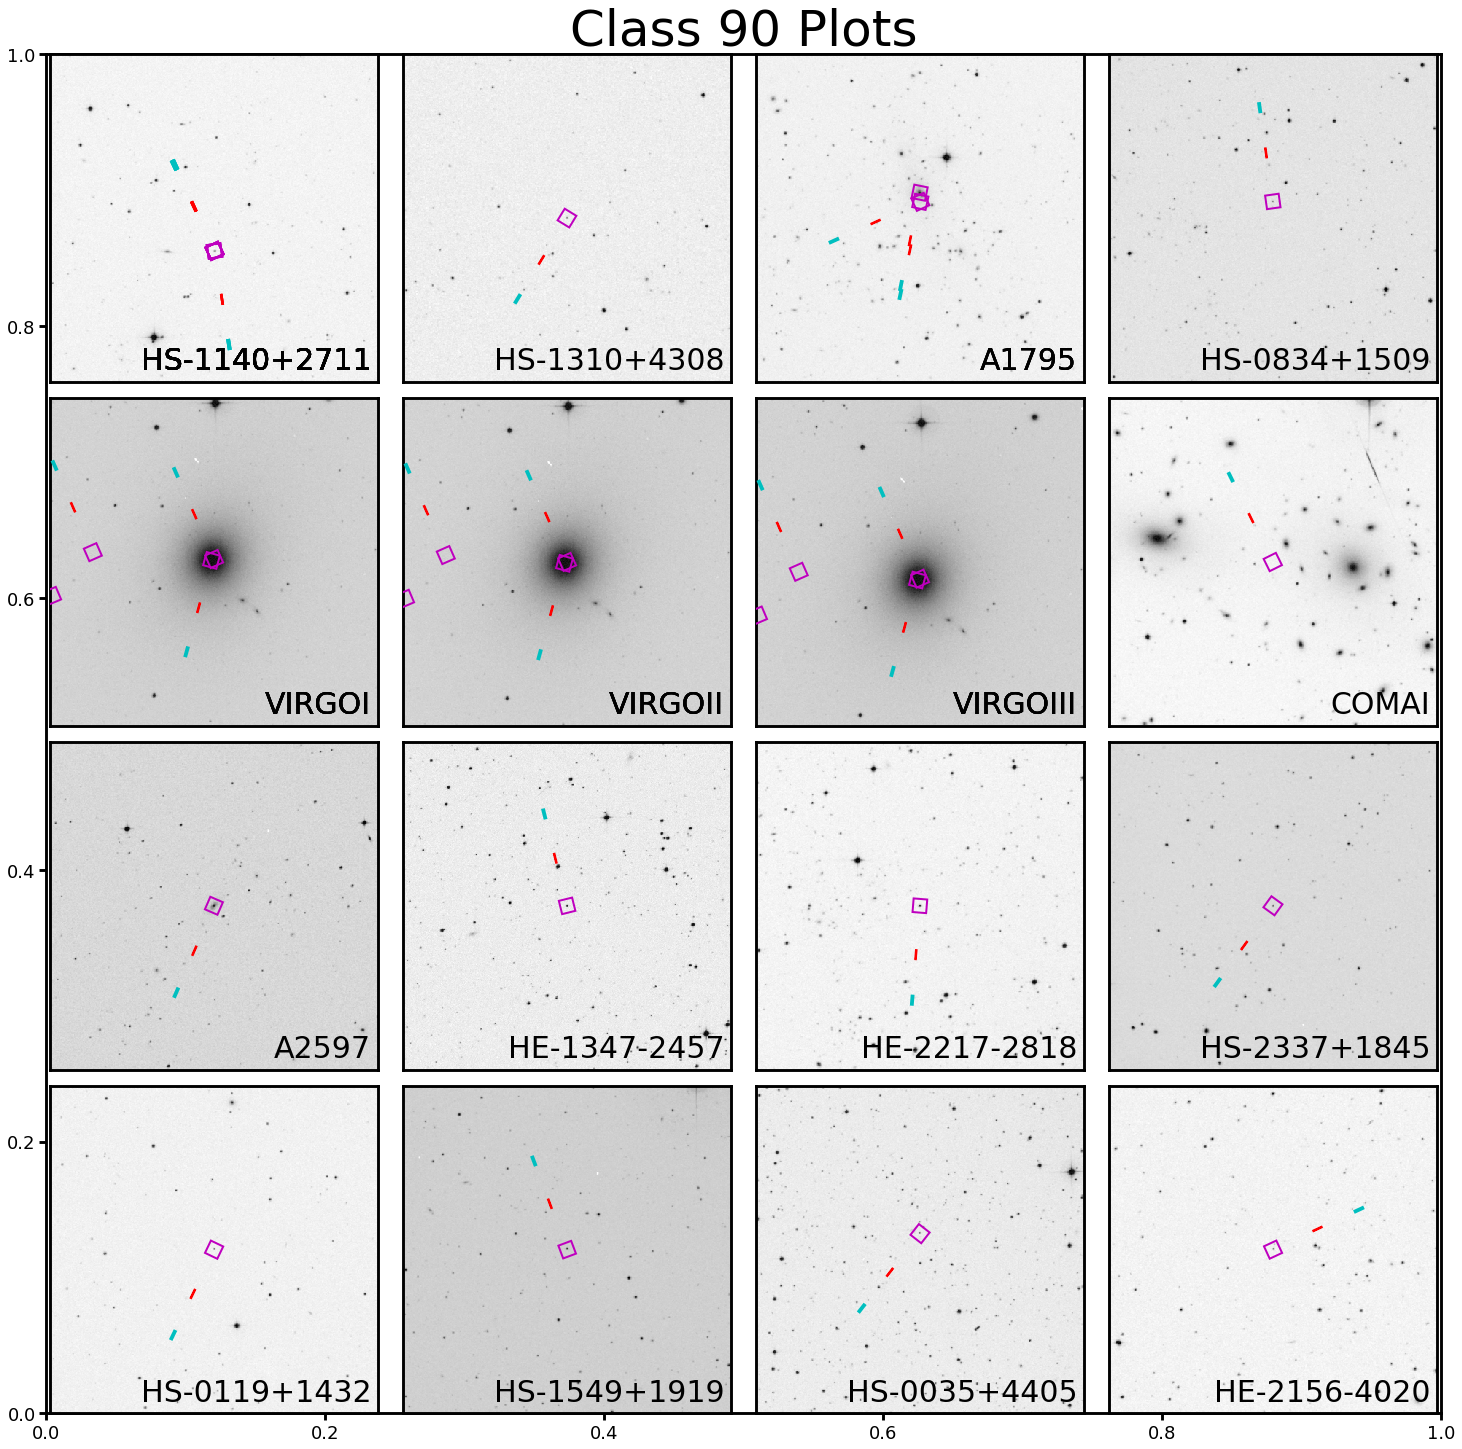

<Figure size 1440x2160 with 0 Axes>

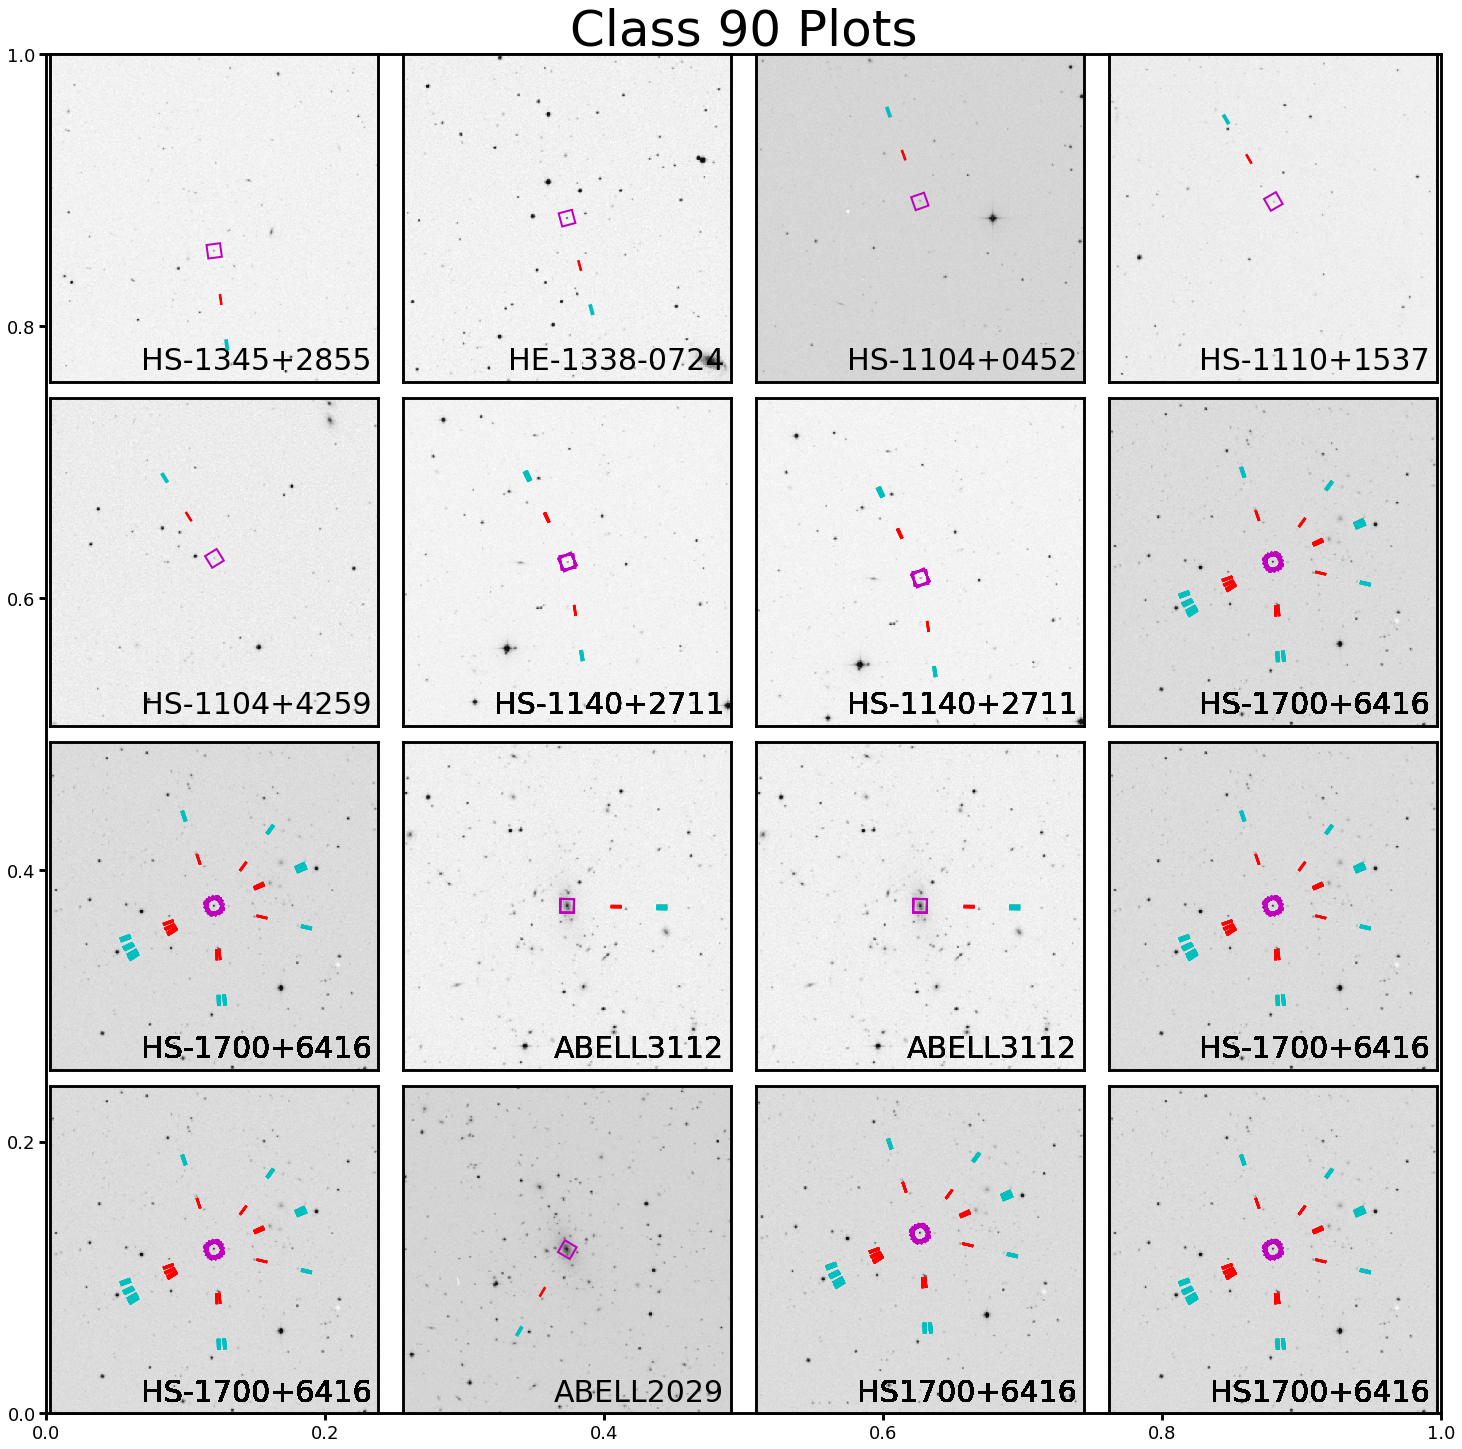

<Figure size 1440x2160 with 0 Axes>

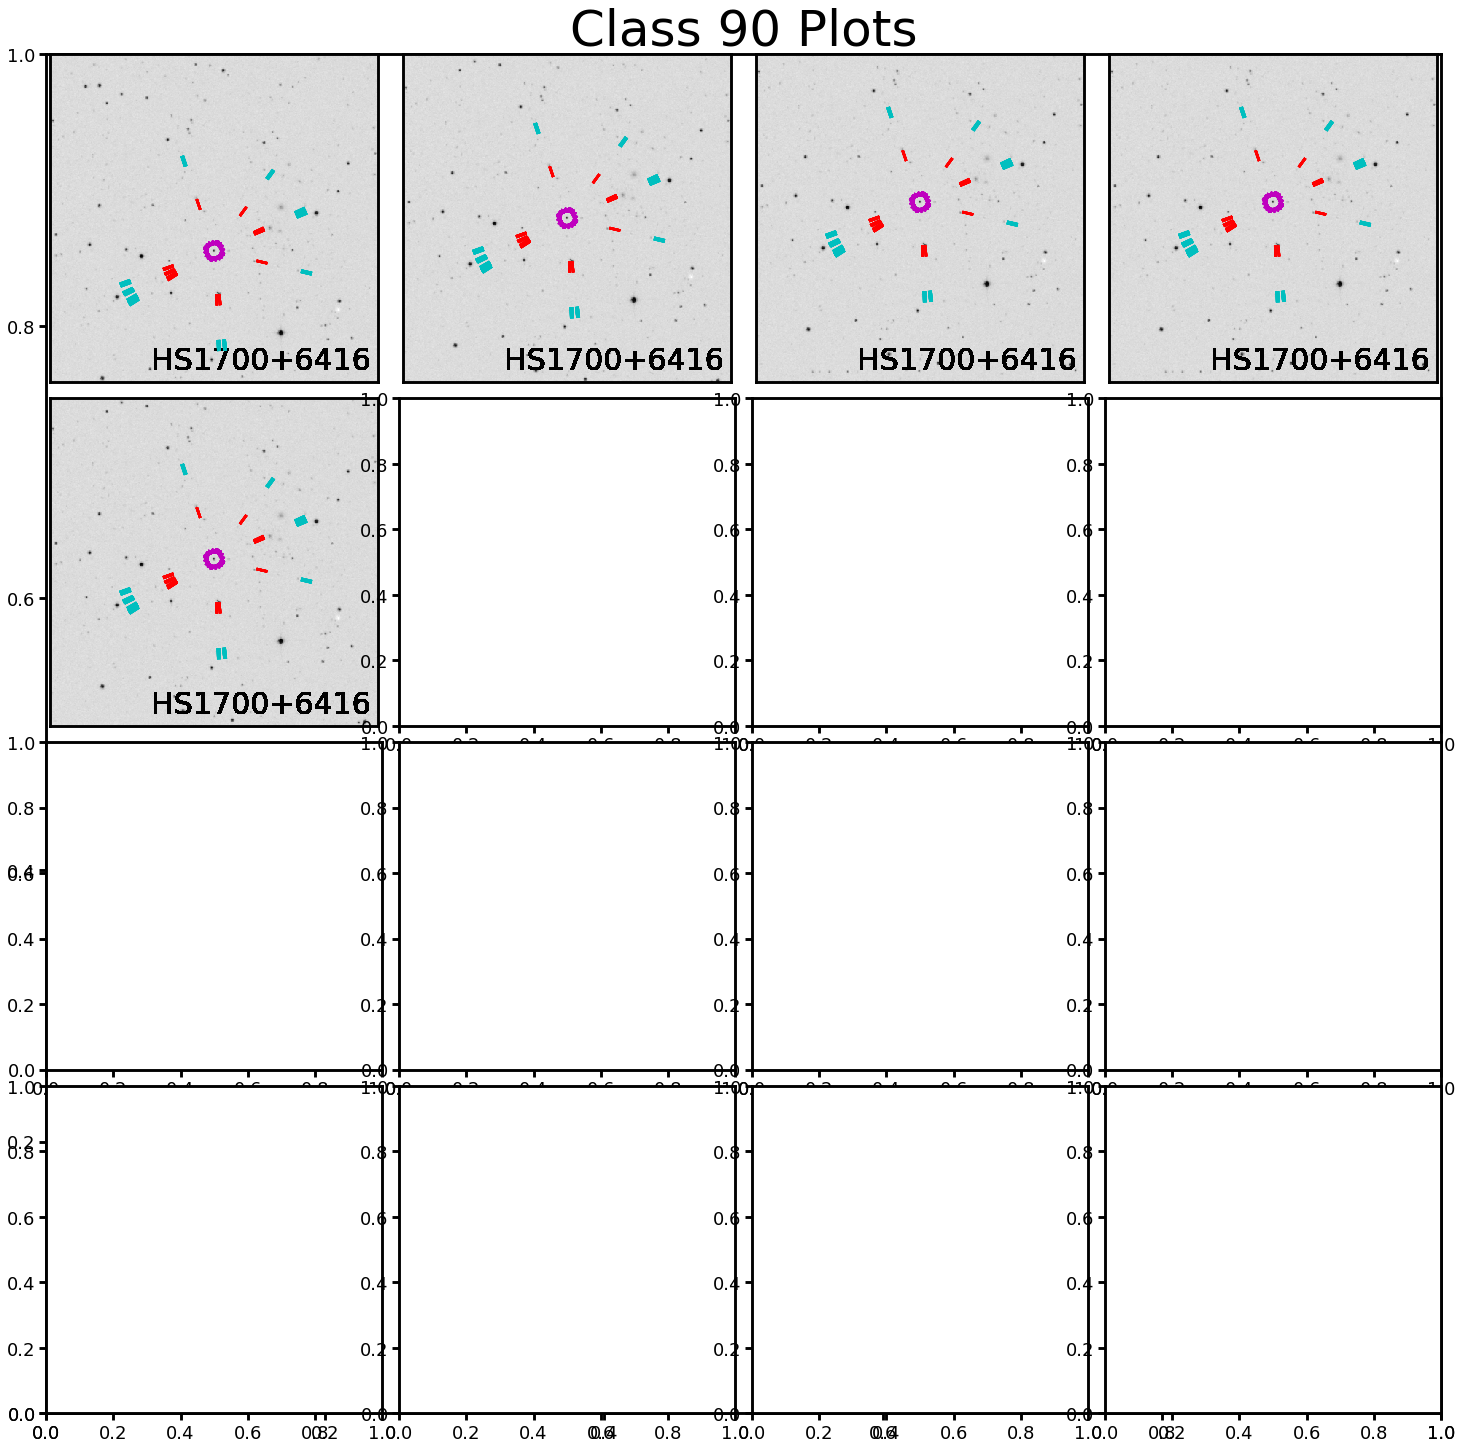

In [10]:
#Main Plotting Block

def p16(pg):
    set_rcparams_prop(amp=1.15)

    rr=1
    aa=6
    wrs=np.array([1.8, 0.2, 1.2, 0.05])
    hrs=np.array([1])
    fig = plt.figure(figsize=(20, 30))
    fig = plt.figure(figsize=(25, 25))
    plt.title("Class {} Plots".format(obn),fontdict={'fontsize': 50})
    ncol=4
    nrow=4
    gs1 = gridspec.GridSpec(nrow, ncol, figure=fig, 
    #                         width_ratios=wrs, height_ratios=hrs,
                            hspace=0.05, wspace=0.05
                           )
    pidxs=np.arange(ncol*nrow)
    axs=[]
    for i in range(len(pidxs)):
        ax=fig.add_subplot(gs1[i // ncol, i%ncol])
        axs.append(ax)


    fidx=[0,0,0,0,0,
          0,0,0,0,0,
          0,0,0,0,0,
          0,0,0,0
         ]

    # fidx=[1,0,0,0,0,
    #       0,0,1,0,0,
    #       0,0,0,0,0,
    #       0,0,0,0
    #      ]

    # fidx=[1,0,0,0,0,
    #       0,0,1,0,0,
    #       1,0,0,1,0,
    #       0,0,0,0
    #      ]                 #Working for RED

    # fidx=[1,1,1,1,1,
    #       1,1,1,1,1,
    #       1,1,1,1,1,
    #       1,1,1,1
    #      ]

    # cut_widths=np.array([
    #     350,300,400,400,
    #     400,400,1400,1600,
    #     600,1600,300,250,
    #     250,250,500,400,
    # ])/3600*2           # Working for RED

    cut_widths=np.array([
        240,240,240,240,
        240,240,240,240,
        240,240,240,240,
        240, 240,240,240,
    ])/3600*3 

    print(cut_widths[1])


    raoffs=np.array(
        [0,0,0,0,
         0.0,0,0.0,0,
         0,0,0,0,
         0,0,0,0,
        ]
    )

    decoffs=np.array(
        [0.1,0,-0.05,-0.05,
         -0.01,0,.05,0,
         0,0,0,0,
         0,0,-0.05,0,
        ]
    )

    minsep=0.5
    file_sc=SkyCoord(fdf.ra, fdf.dec, frame='icrs', unit='deg')    


    for i in range(0,16,1):

        ax=axs[i]
        try:
            objname=objnames[i + 16*pg]
        except:
            break
        print(objname)
        sdf=df.loc[df['objname']==objname,:]
        sdf.index=np.arange(len(sdf))
        ra0, dec0=sdf.loc[0,'ra'], sdf.loc[0,'dec']
    #     print(ra0, dec0)
        c = SkyCoord(ra0, dec0, frame='icrs', unit='deg')

        cond=np.array(file_sc.separation(c))<minsep
        match_df=fdf[cond]
        match_df.index=np.arange(np.sum(cond))

        if computer ==1:
            fits_file=match_df.loc[fidx[i],'file_path'][0:48] + match_df.loc[fidx[i],'file_path'][64:] #61forblue,60forred
            fits_file=match_df.loc[fidx[i],'file_path'][0:44] + match_df.loc[fidx[i],'file_path'][64:] #Skyview
        if computer == 2:
            fits_file=match_df.loc[fidx[i],'file_path'][0:62] + match_df.loc[fidx[i],'file_path'][78:] #Other comp
            fits_file=match_df.loc[fidx[i],'file_path'][0:58] + match_df.loc[fidx[i],'file_path'][78:] #Other comp Skyview

        print(fidx[i])
        print('number of matched DF', len(match_df))
        hdu=fits.open(os.path.normpath(fits_file))
        hdr=hdu[0].header
        oiwcs=astropy.wcs.WCS(header=hdr) 
        print(fits_file)

        cmap=cm.gray_r
        origin='lower'

        oim=hdu[0].data

        ra0, dec0=sdf.loc[0,'ra']+cut_widths[i]*raoffs[i], sdf.loc[0,'dec']+cut_widths[i]*decoffs[i]
    #     print(ra0, dec0)
        cc = SkyCoord(ra0, dec0, frame='icrs', unit='deg')

        print(oiwcs,cc)
        print('npt',len(sdf))
        img_cutout_obj=Cutout2D(oim, cc, 
                           u.Quantity(cut_widths[i], unit='deg'),
                           wcs=oiwcs,
                        mode='trim',
    #                     mode='partial',
                       )

        im=img_cutout_obj.data
        iwcs=img_cutout_obj.wcs


        img=ax.matshow(im, 
                   cmap=cmap, 
                   origin=origin, interpolation='none', 
    #                zorder=1,
    #               alpha=alpha, zorder=zorder, aspect=aspect, 
    #                norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)
                      )
    #     print(objname)


        for j in range(len(sdf)):
            jra, jdec=sdf.loc[j,'ra'], sdf.loc[j,'dec']        
            c_obj=SkyCoord(jra, jdec, 
                                              unit='deg',
                                              frame='icrs')
            if sdf.loc[j,'aperture']=='MDRS':
                sep=u.Quantity(-90.18-118.07, unit='arcsec')
                c_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)
                print('MDRS!!!')

            sep=u.Quantity(90.18+118.07, unit='arcsec')
            m_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)
            sep=u.Quantity(-10.27+118.07, unit='arcsec')
            h_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)

            objs=[c_obj, m_obj, h_obj]
            xws=[30,4,1.25]
            yws=[30,20,20]
            clrs=['m','c','r']

            for k in range(3):
                pcent_x, pcent_y=iwcs.world_to_pixel(objs[k])
                psm=iwcs.pixel_scale_matrix
                pscale=(psm[0,0]**2+psm[0,1]**2)**0.5
        #         print('pscale',pscale)
                pxwidth=xws[k]/3600/pscale
                pywidth=yws[k]/3600/pscale
    #             edgecolor='m'
                edgecolor=clrs[k]
        #         edgecolor='k'
                sqlw=2


                rot_ang=0
                rot_ang=sdf.loc[j,'pa']
                recx, recy=rec_rotate(pcent_x, pcent_y, pxwidth, pywidth, rot_ang)
                rec=matplotlib.patches.Rectangle((recx, recy,), pxwidth, pywidth, alpha=1, 
                                                 angle=rot_ang,
                                                 zorder=20,
            #     rec=matplotlib.patches.Rectangle((pcent_x-pxwidth/2,pcent_y-pywidth/2), pxwidth, pywidth, alpha=1, 
            #                                      angle=(-180),
            #                                   facecolor='w', fill=True)
                                        linewidth=sqlw, edgecolor=edgecolor, linestyle='-', fill=False)
                #                                               linewidth=1.5, edgecolor='w', linestyle=esty[k-1], fill=False)
                art=ax.add_artist(rec)
            ax.text(0.98,0.02,objname,
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    transform=ax.transAxes,
                    size=30
                   )
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_aspect('equal')

    #         pcent_x, pcent_y=iwcs.world_to_pixel(m_obj)
    #         psm=iwcs.pixel_scale_matrix
    #         pscale=(psm[0,0]**2+psm[0,1]**2)**0.5
    # #         print('pscale',pscale)
    #         pxwidth=4/3600/pscale
    #         pywidth=20/3600/pscale
    #         edgecolor='c'
    # #         edgecolor='k'
    #         sqlw=3


    #         rot_ang=0
    #         rot_ang=sdf.loc[j,'pa']
    #         recx, recy=rec_rotate(pcent_x, pcent_y, pxwidth, pywidth, rot_ang)
    #         rec=matplotlib.patches.Rectangle((recx, recy,), pxwidth, pywidth, alpha=1, 
    #                                          angle=rot_ang,
    #                                          zorder=20,
    #     #     rec=matplotlib.patches.Rectangle((pcent_x-pxwidth/2,pcent_y-pywidth/2), pxwidth, pywidth, alpha=1, 
    #     #                                      angle=(-180),
    #     #                                   facecolor='w', fill=True)
    #                                 linewidth=sqlw, edgecolor=edgecolor, linestyle='-', fill=False)
    #         #                                               linewidth=1.5, edgecolor='w', linestyle=esty[k-1], fill=False)
    #         art=ax.add_artist(rec)

    csp=0.0
    fig.subplots_adjust(wspace=csp, hspace=csp)

    # aa=cc.separation(c)
    # np.array(Angle(aa, unit=u.deg))<0.5
    match_df

    hdu.close()


    
    #fig.savefig(fname,dpi=256, bbox_inches='tight')
    return(fig)

names = ["Starburst.pdf", "EmissionLineGalaxy.pdf", "IntergalacticMedium.pdf"]
p = "{}".format(obn)+names[2]
with PdfPages(p) as pdf:
    for j in range(0, math.ceil(len(objnames)/16 )):
        print(j)
        fig = p16(0+j)
        pdf.savefig(fig)
    
    
 



t =  SkyCoord(314.027375, 31.93488889, unit = 'deg')


p

In [11]:
p

'90IntergalacticMedium.pdf'